1. Import required libraries and read the dataset.

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [138]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\python data analysis project\\Apps_data+(1) (1).csv")


In [139]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [140]:
df.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [141]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [142]:
df.shape

(10841, 13)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [144]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


4. Check if there are any duplicate records in the dataset? if any drop them.

In [145]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [146]:
df.drop_duplicates(inplace=True)


 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [147]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [148]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [149]:
df.drop(10472, inplace=True)


6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [150]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [151]:
df.dropna(inplace=True)

In [152]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [153]:
df['Rating_category']=df['Rating'].apply(lambda x: 'high' if x>3.5 else 'low')

In [154]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [155]:
df['Rating_category'].value_counts()

Rating_category
high    8007
low      879
Name: count, dtype: int64

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   object 
 4   Size             8886 non-null   object 
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [157]:
df['Reviews']=pd.to_numeric(df['Reviews'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1afdc2db1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1afdc2cc510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1afdc2da8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1afdc2cd5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1afdc2cdf10>],
 'means': []}

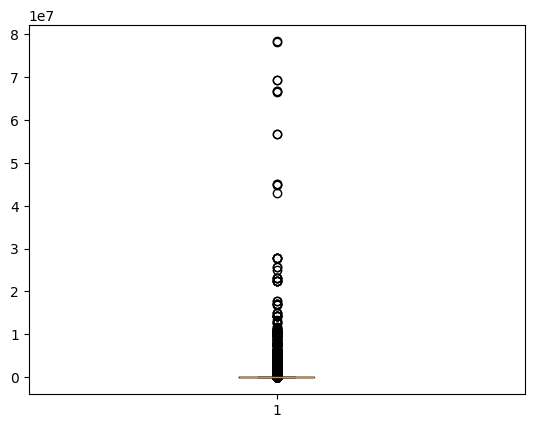

In [158]:
plt.boxplot(df['Reviews'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1afdc3429d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1afdc343e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1afdc3420d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1afdc3417d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1afdc350c10>],
 'means': []}

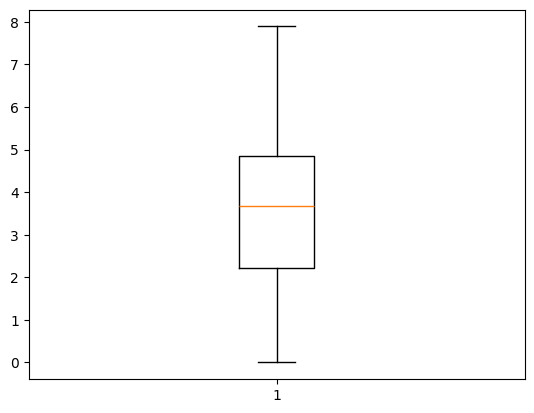

In [159]:
plt.boxplot(np.log10(df['Reviews']))



9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [160]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [161]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [162]:
df['Size']=df['Size'].str.replace('m','e+6')

In [163]:
df['Size']=df['Size'].str.replace('k','e+3')

In [185]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201e+3', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M',
       '3.4M', '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M',
       '1.1M', '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M',
       '2.6M', '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '2.1M', '42M', '9.1M', '55M', '23e+3', '7.3M', '6.5M', '1.5M',
       '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M',
       '79e+3', '8.4M', '3.7M', '118e+3', '44M', '695e+3', '1.6M', '6.2M',
       '53M

10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [164]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [165]:
df['Installs']=df['Installs'].apply(lambda x:int(x.replace(',','').replace('+','')))

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [166]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [167]:
df['Price']=df['Price'].apply(lambda x:(x.replace('$','')))

In [168]:
df['Price']=pd.to_numeric(df['Price'])

12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [169]:
columns=['rating_category', 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']

In [170]:
df.drop(columns=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

13. Encode the categorical columns.

In [171]:
lg=LabelEncoder()


In [172]:
df['Content Rating']=lg.fit_transform(df['Content Rating'])

In [173]:
df.columns


Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [174]:
df['Category']=lg.fit_transform(df['Category'])

In [175]:
df['Type']=lg.fit_transform(df['Type'])

In [176]:
df['Rating_category']=lg.fit_transform(df['Rating_category'])

14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [177]:
df.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Rating_category'],
      dtype='object')

In [178]:
x=df[['Category','Reviews','Size','Installs','Type','Price','Content Rating']]

In [179]:
y=df[['Rating_category']]

In [180]:
x

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,159,19M,10000,0,0.0,1
1,0,967,14M,500000,0,0.0,1
2,0,87510,8.7M,5000000,0,0.0,1
3,0,215644,25M,50000000,0,0.0,4
4,0,967,2.8M,100000,0,0.0,1
...,...,...,...,...,...,...,...
10834,11,7,2.6M,500,0,0.0,1
10836,11,38,53M,5000,0,0.0,1
10837,11,4,3.6M,100,0,0.0,1
10839,3,114,Varies with device,1000,0,0.0,3


In [181]:
y

,Rating_category
0,0
1,0
2,0
3,0
4,0
...,...
10834,0
10836,0
10837,0
10839,0


15. Split the dataset into train and test.

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [187]:
from sklearn.linear_model import LinearRegression

In [189]:
lr=LinearRegression